In [1]:
from datascience import *
import numpy as np
from math import *
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

## Lesson 30: Properties of Estimators

Now that we have seen two different ways to obtain parameter estimates, we will now look into ways to evaluate estimators. What makes an estimator a good estimator? We have briefly discussed bias, but we'll also discuss consistency. 

### Bias

(Review from Lesson 28). If we use an iid random sample to obtain an estimate of some parameter $\theta$, this estimate ($\hat{\theta}$) is a random variable. Each time I collect a new sample, I will get a different $\hat{\theta}$. Ideally, the distribution of this $\hat{\theta}$ should have an average (expected value) of $\theta$. 

If $E(\hat{\theta})=\theta$, then $\hat{\theta}$ is said to be unbiased. 

### Example 1: Uniform Distribution

Suppose $X_1,X_2,...,X_n$ is an iid sequence of random variables from the continuous uniform distribution on the domain $0 \leq X \leq b$ with unknown parameter $b$. From lessons 28, we found that the method of moments estimate of $b$ is $2\bar{X}$. 

Is this estimate biased? Particularly, find $E(2\bar{X})$. 


Here, we perform some fairly basic algebra to find $E(2 \bar X)$ using properties of the moment estimate,

$E(2 \bar X) = 2E(\bar X) = 2E(\frac{\sum_{i=1}^n X_i}{n})$

Note that from Lesson 28, we found that ${\bar X} = \frac{b}{2}$. For the given summation, this gives us

$2E(\frac{\sum_{i=1}^n X_i}{n}) = \frac{2}{n}E({\sum_{i=1}^n X_i}) = \frac{2}{n}*\frac{nb}{2} = b$

Therefore, the estimate is unbiased.

### Example 2: Exponential Distribution

Suppose $X_1,X_2,...,X_n$ is an iid sequence of random variables from the exponential distribution with unknown parameter $\lambda$. From lessons 28 and 29, we found that the method of moments and maximum likelihood estimates are both $\frac{1}{\bar{X}}$. 

Is this estimate biased? For this exercise, assume $\lambda=5$ and the size of each sample is 20. You will probably find it easier to do this via simulation (use `scipy` to generate a random sample from the exponential distribution with your choice of $\lambda$. Use this sample to obtain the estimate. Repeat this process many times to get a distribution $\hat{\lambda}$.) 

In [4]:
lam_parameters = []

for i in np.arange(10 ** 4):
    new_lam = 1/np.mean(stats.expon.rvs(scale = 1/5, size = 20))
    lam_parameters = np.append(lam_parameters,new_lam)
    
lam = np.mean(lam_parameters)
lam # estimated value

5.253898129647515

The simulated value for parameter $\lambda$ is slightly higher than the expected value of 5. Therefore, the estimate is likely biased.

## Consistency

An estimator is considered consistent if for any $\epsilon >0$, 

$$
\underset{n \to \infty}{\lim} P(|\hat{\theta}_n -\theta|<\epsilon)=1
$$

This is just a fancy way of saying that as $n$ increases, the estimator tends to get closer to $\theta$. 

### Lemma

An estimator is consistent if it is unbiased and if $\underset{n \to \infty}{\lim} Var(\hat{\theta}_n)=0$. In other words, an unbiased estimator is consistent if its variance goes to zero as sample size goes to infinity. 

### Example 3: Uniform Distribution

In Example 1, we showed that the method of moments estimator for $b$ is unbiased. Is it also consistent? What is the variance of this estimator? What happens to this variance as $n$ increases? 

From Lesson 13, we have that the variance of $\hat b$ for a uniform distribution is 

$Var(\hat {b}_n) = \frac{\hat b^2}{12}$

Thus,

$Var(\hat {b}_n) = \frac{(2 \bar X)^2}{12} = \frac{4 {\bar X}^2}{12} = \frac{4(\frac{\sum_{i=1}^n X_i}{n})^2}{12}$

We take the limit of this expression as n approaches infinity and set this equal to zero to verify consistency. 

$\underset{n \to \infty}{\lim} \frac{4(\frac{\sum_{i=1}^n X_i}{n})^2}{12} =\frac{4(0)^2}{12} = 0$

To view the behavior of the variance as $n$ increases, we can simulate numerically.

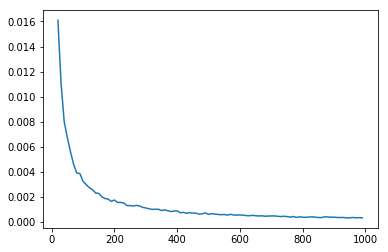

In [5]:
# Simulate the variance of 2X_bar for increasing n
# Here, I will show a plot of the results instead of a final value
var_estimates = []

for i in np.arange(20,10**3,10):
    x_bars = []
    for j in np.arange(10**3):
        x_bars.append(2*np.mean(stats.uniform.rvs(size = i)))
    var_estimates.append(np.var(x_bars))

plt.plot(np.arange(20,10**3,10),var_estimates)
plt.show()

As seen above, the variance approaches zero as $n$ increases, verifying our analytical result.

### Example 4: Normal Distribution

Suppose $X_1,X_2,...,X_n$ is an iid sequence of random variables from the normal distribution with unknown mean and standard deviation. The method of moments (and maximum likelihood) estimator of $\mu$ is simply $\bar{X}$. We have already established that this estimate is unbiased. Is it consistent? 

From Lesson 13, we have that the variance of $\hat \mu$ for a normal distribution with a pmf of 1 is

$Var(\hat {\mu}_n) = {\sum_x (\hat \mu - \mu)^2} = {\sum_x (\bar X - \mu)^2} = {\sum_x (\frac{\sum x_i}{n} - {\sum x_i})^2} = {\sum_x (\frac{n \sum x_i - \sum x_i}{n^2})^2}$

Taking the limit of this expression as $n$ approaches infinity, $n^2$ clearly grows faster than $n$, and the result is $0$. Thus, the estimate is consistent. Below is a visual of a simulation to show trends as $n$ increases.

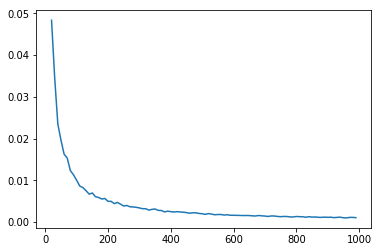

In [6]:
# Same methodology, just for different parameter estimate

var_estimates = []

for i in np.arange(20,10**3,10):
    x_bars = []
    for j in np.arange(10**3):
        x_bars.append(np.mean(stats.norm.rvs(size = i))) # modification
    var_estimates.append(np.var(x_bars))

plt.plot(np.arange(20,10**3,10),var_estimates)
plt.show()

Again, the variance approaches zero as $n$ increases.

## Weak Law of Large Numbers

It turns out that for all distributions, the sample mean is a consistent estimator for the population mean. This is known as the Weak Law of Large Numbers. 

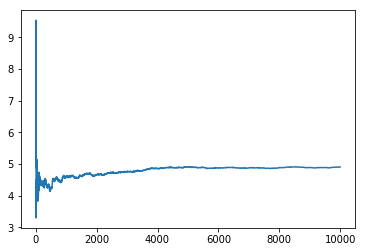

In [20]:
ns=np.arange(1,10001)
samp=stats.norm.rvs(5,6,size=10000)
sampmeans=np.cumsum(samp)/ns
plt.plot(ns,sampmeans)
plt.show()

Documentation: C2C Williams showed me how to numerically simulate answers for Examples 3 and 4.